
# Outliers
  
Os outliers são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

Entender os outliers é fundamental em uma análise de dados por pelo menos dois aspectos:

os outliers podem viesar negativamente todo o resultado de uma análise;
o comportamento dos outliers pode ser justamente o que está sendo procurado.
Os outliers presentes em datasets  (o que são datasets) possuem diversos outros nomes, como:

- dados discrepantes;
- pontos fora da curva; (o que é curva normal?)
- observações fora do comum;
- anomalias;
- valores atípicos

Após reconhecer os dados discrepantes da sua análise, é preciso tomar certos cuidados para que a efetividade da mesma não seja comprometida. Algumas alternativas são:

1) ELIMINAR O VALOR

Caso seu dataset seja amplo o suficiente, é possível simplesmente excluir o valor anômalo sem causar grandes prejuízos à análise de dados.

2) TRATAR SEPARADAMENTE

Se a quantidade de outliers for relativamente grande, uma opção é realizar uma análise separada somente com esses dados. É possível separá-los em dois grupos e criar modelos específicos para analisá-los. Essa solução é útil para investigar casos extremos, como por exemplo casos de empresas que continuam vendendo bastante e lucrando mesmo em tempos de crise.

3) TRANSFORMAÇÃO LOGARÍTMICA

Transformar os dados logaritmicamente é uma técnica que pode diminuir a variação causada pelos valores extremos e anômalos.

4) MÉTODOS DE CLUSTERIZAÇÃO

Utilize esses métodos para achar uma aproximação que corrige e dá um novo valor aos outliers. Por exemplo, se os outliers forem causados por erros de input, ao invés de eliminar e perder uma linha inteira de registros, uma solução é usar algoritmos de clusterização. Esses algoritmos encontram o comportamento das observações mais próximas ao outlier e fazem uma interferência de qual seria o melhor valor aproximado.

Identificação de ouliers

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_loan = pd.read_csv('./dados/Loan_Default.csv')
df_loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,construction_type,occupancy_type,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,sb,pr,1740.0,EXP,758,25-34,to_inst,98.728814,south,1
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,sb,pr,4980.0,EQUI,552,55-64,to_inst,NaN,North,1
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,9480.0,EXP,834,35-44,to_inst,80.019685,south,0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,sb,pr,11880.0,EXP,587,45-54,not_inst,69.376900,North,0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,10440.0,CRIF,602,25-34,not_inst,91.886544,North,0


- **Box-Plot:**
Os box-plot, assim como os histogramas, são gráficos estatísticos que permitem analisar uma distribuição dos dados, mas com uma representação diferente. Apesar de muito utilizados por estatísticos e cientistas de dados, a maioria das pessoas que não estão acostumadas a eles, têm dificuldade em interpretá-los. 

A representação do box-plot se baseia em medidas de quartis: uma caixinha central é desenhada ligando o primeiro (Q1) e terceiro (Q3) quartis (25% e 75%, respectivamente), e uma reta corta essa 'caixa' no quartil central (Q2 = 50%). Na parte inferior e superior do gráfico, é traçada uma reta de tamanho máximo 1.5xIQ, em que IQ = Q3-Q1. Essa reta é traçada até o último valor da variável que ainda esteja dentro desse limite. Observações acima ou abaixo dele, são representadas por bolinhas, e muito chamadas de 'outliers' (valor atípico). Abaixo, uma representação dos componentes de um box-plot, e um gráfico exibindo box-plots das distribuições de temperaturas de diferentes cidades.
<img src="./images/boxplot2.png" alt="Drawing" style="width: 500px;"/>
<img src="./images/boxplot.png" alt="Drawing" style="width: 500px;"/>

<AxesSubplot:>

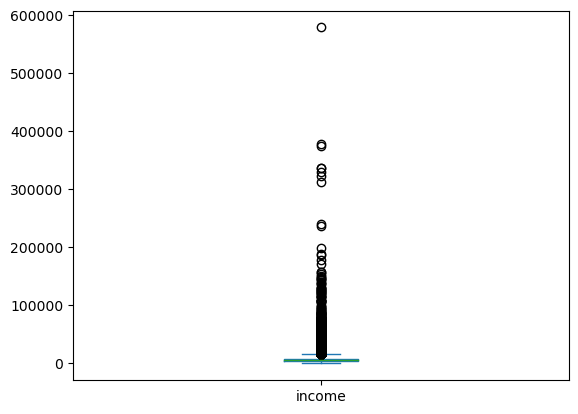

In [5]:
df_loan['income'].plot(kind='box')

<AxesSubplot:>

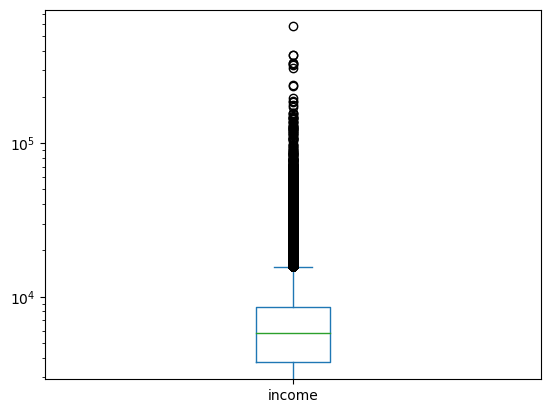

In [4]:
df_loan['income'].plot(kind='box', logy=True)

**Bora praticar!**
  
Os bancos obtêm uma receita importante com empréstimos concedidos. Mas muitas vezes está associado ao risco. O mutuário pode não pagar o empréstimo. Para mitigar esse problema, os bancos decidiram usar o Machine Learning para superar esse problema. Eles coletaram dados anteriores sobre os tomadores de empréstimos e gostariam que você desenvolvesse um modelo de ML forte para classificar se algum novo devedor provavelmente entrará em default ou não.  
  
O conjunto de dados é enorme e consiste em vários fatores determinísticos, como renda do mutuário, gênero, finalidade do empréstimo, etc. O conjunto de dados está sujeito a uma forte multicolinearidade e valores vazios. Você pode superar esses fatores e construir um classificador forte para prever inadimplentes?  
  
Importe a base **Loan_Default.csv** que está em csv dentro do diretório **dados**.

In [6]:
df_loan = pd.read_csv('./dados/Loan_Default.csv')
df_loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,construction_type,occupancy_type,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,sb,pr,1740.0,EXP,758,25-34,to_inst,98.728814,south,1
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,sb,pr,4980.0,EQUI,552,55-64,to_inst,NaN,North,1
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,9480.0,EXP,834,35-44,to_inst,80.019685,south,0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,sb,pr,11880.0,EXP,587,45-54,not_inst,69.376900,North,0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,10440.0,CRIF,602,25-34,not_inst,91.886544,North,0


In [7]:
df_loan.shape

(148670, 25)

In [8]:
df_loan.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'income', 'credit_type',
       'Credit_Score', 'age', 'submission_of_application', 'LTV', 'Region',
       'Status'],
      dtype='object')

In [9]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_only              148670 non-null  object 
 13  lump_sum_payment           14

In [11]:
df_loan[['lump_sum_payment']]

,lump_sum_payment
0,not_lpsm
1,lpsm
2,not_lpsm
3,not_lpsm
4,not_lpsm
...,...
148665,not_lpsm
148666,not_lpsm
148667,not_lpsm
148668,not_lpsm


In [12]:
df_loan.describe()

,ID,year,loan_amount,rate_of_interest,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.0,1.486700e+05,112231.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,0.0,1.839093e+05,0.561391,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,24890.000000,2019.0,1.650000e+04,0.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


In [13]:
df_loan.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
income                        9150
credit_type                      0
Credit_Score                     0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Status                           0
dtype: int64

In [14]:
df_loan.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
income                        9150
credit_type                      0
Credit_Score                     0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Status                           0
dtype: int64

In [15]:
(df_loan.isnull().sum() / len(df_loan))*100

ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
income                        6.154571
credit_type                   0.000000
Credit_Score                  0.000000
age                           0.134526
submission_of_application     0.134526
LTV                          10.155378
Region                        0.000000
Status                        0.000000
dtype: float64

Análise de variáveis contínuas

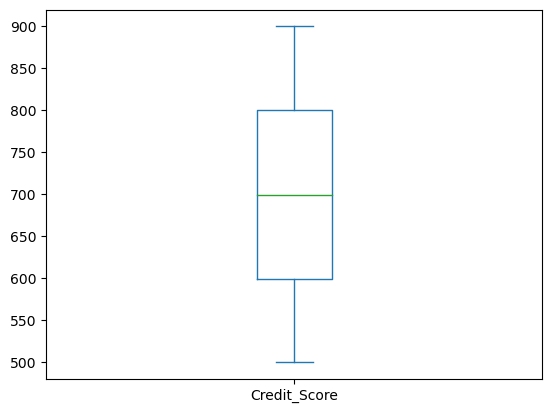

In [16]:
df_loan[['Credit_Score']].plot(kind='box');

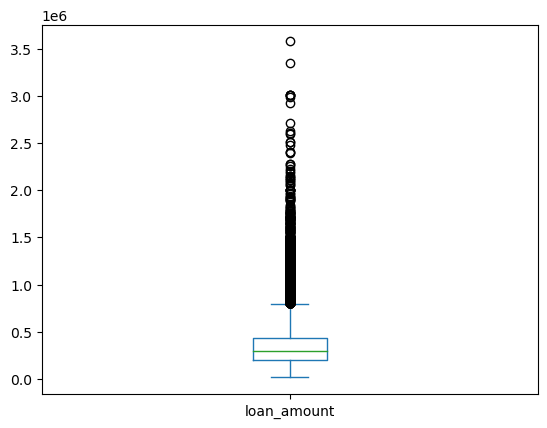

In [17]:
df_loan[['loan_amount']].plot(kind='box');

Vamos analisar nossa variável de interesse **Status**

In [18]:
df_loan['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

In [19]:
df_loan['Status'].value_counts(normalize=True)

0    0.753555
1    0.246445
Name: Status, dtype: float64

In [20]:
df_loan['Status'].mean()

0.24644514696979888

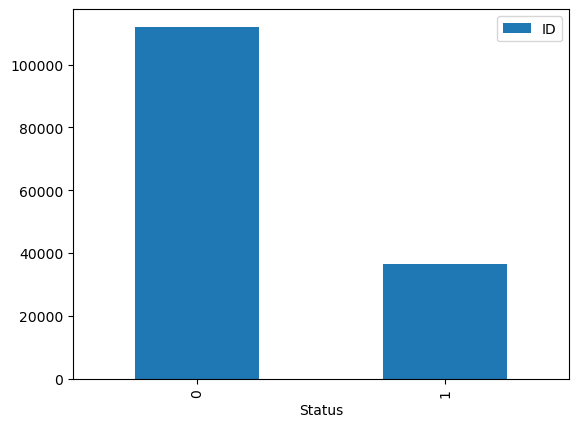

In [27]:
df_loan.pivot_table(index='Status', aggfunc='count')[['ID']].plot(kind='bar');

Podemos analisar outras variáveis de interese também

In [28]:
df_loan['age'].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

In [29]:
df_loan.pivot_table(index='age', aggfunc='count', values='ID')

,ID
age,
25-34,19142
35-44,32818
45-54,34720
55-64,32534
65-74,20744
<25,1337
>74,7175


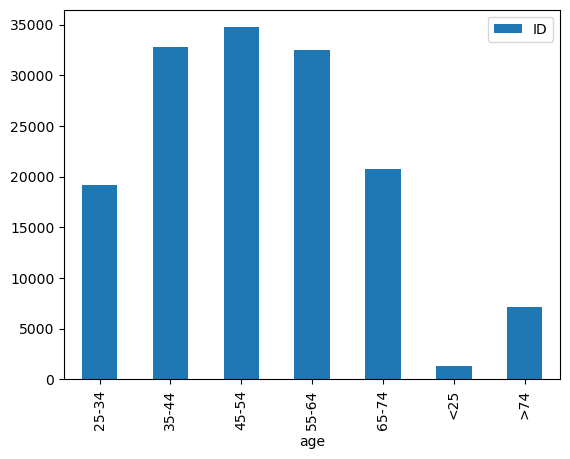

In [30]:
df_loan.pivot_table(index='age', aggfunc='count', values='ID').plot(kind='bar');

In [31]:
df_loan['credit_type'].value_counts()

CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: credit_type, dtype: int64

Agora podemos verificar as relações das variáveis presentes no dataset com a nossa variável de interesse.

In [32]:
df_loan.pivot_table(index='credit_type', values='Status', aggfunc='mean')

,Status
credit_type,
CIB,0.158041
CRIF,0.162343
EQUI,0.999935
EXP,0.159854


In [33]:
df_loan.pivot_table(index='income', values='Status', aggfunc='mean')

,Status
income,
0.0,0.993651
60.0,1.000000
120.0,0.833333
180.0,1.000000
240.0,1.000000
...,...
329460.0,0.000000
335880.0,0.000000
374400.0,0.000000


In [53]:
def salarios(salario):
    if np.isnan(salario):
        return np.nan
    elif salario <= 1000:
        return "0-1000"
    elif salario <= 2000:
        return "1000-2000"
    elif salario <= 5000:
        return "2000-5000"
    else:
        return ">5000"

In [54]:
df_loan['faixa_salario'] = df_loan['income'].apply(salarios)
df_loan.pivot_table(index='faixa_salario', values='Status', aggfunc='mean')

,Status
faixa_salario,
0-1000,0.909242
1000-2000,0.415637
2000-5000,0.282545
>5000,0.209614


In [36]:
df_loan.pivot_table(index='Region', values='Status', aggfunc='mean')

,Status
Region,
North,0.225114
North-East,0.304453
central,0.275382
south,0.266293


In [37]:
df_loan.pivot_table(index='age', values='Status', aggfunc='mean')

,Status
age,
25-34,0.221920
35-44,0.222713
45-54,0.240467
55-64,0.258868
65-74,0.268560
<25,0.289454
>74,0.300070


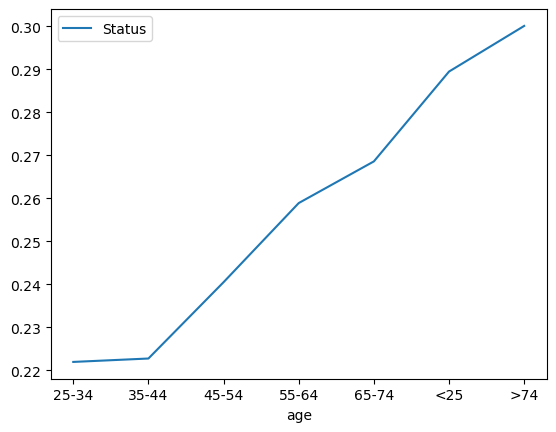

In [39]:
df_loan.pivot_table(index='age', values='Status', aggfunc='mean').plot(kind='line');

In [3]:
df_loan.corr()

C:\Users\felip\AppData\Local\Temp\ipykernel_6376\1903546262.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_loan.corr()


,ID,year,loan_amount,rate_of_interest,property_value,income,Credit_Score,LTV,Status
ID,1.000000,NaN,-0.000566,0.000442,0.000990,0.002535,-0.001036,-0.005853,0.001703
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,-0.000566,NaN,1.000000,-0.150844,0.734249,0.456065,0.004438,0.038869,-0.036825
rate_of_interest,0.000442,NaN,-0.150844,1.000000,-0.122613,-0.041809,-0.001331,-0.000220,0.022957
property_value,0.000990,NaN,0.734249,-0.122613,1.000000,0.414883,0.002430,-0.215102,-0.048864
income,0.002535,NaN,0.456065,-0.041809,0.414883,1.000000,0.000802,-0.066203,-0.065119
Credit_Score,-0.001036,NaN,0.004438,-0.001331,0.002430,0.000802,1.000000,-0.005533,0.004004
LTV,-0.005853,NaN,0.038869,-0.000220,-0.215102,-0.066203,-0.005533,1.000000,0.038895
Status,0.001703,NaN,-0.036825,0.022957,-0.048864,-0.065119,0.004004,0.038895,1.000000


In [8]:
df_loan.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'income', 'credit_type',
       'Credit_Score', 'age', 'submission_of_application', 'LTV', 'Region',
       'Status'],
      dtype='object')

In [10]:
df_loan.drop(labels=['ID', 'year'], axis=1, inplace=True)

df_loan.corr()

C:\Users\felip\AppData\Local\Temp\ipykernel_6376\3989953927.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_loan.corr()


,loan_amount,rate_of_interest,property_value,income,Credit_Score,LTV,Status
loan_amount,1.000000,-0.150844,0.734249,0.456065,0.004438,0.038869,-0.036825
rate_of_interest,-0.150844,1.000000,-0.122613,-0.041809,-0.001331,-0.000220,0.022957
property_value,0.734249,-0.122613,1.000000,0.414883,0.002430,-0.215102,-0.048864
income,0.456065,-0.041809,0.414883,1.000000,0.000802,-0.066203,-0.065119
Credit_Score,0.004438,-0.001331,0.002430,0.000802,1.000000,-0.005533,0.004004
LTV,0.038869,-0.000220,-0.215102,-0.066203,-0.005533,1.000000,0.038895
Status,-0.036825,0.022957,-0.048864,-0.065119,0.004004,0.038895,1.000000


In [14]:
df_loan['Gender'].value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

In [55]:
df_loan_gender = pd.concat([df_loan[df_loan['Gender'] == 'Male'], df_loan[df_loan['Gender'] == 'Female']], axis=0)
df_loan_gender.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,occupancy_type,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Status,faixa_salario
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,pr,4980.0,EQUI,552,55-64,to_inst,NaN,North,1,2000-5000
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,pr,9480.0,EXP,834,35-44,to_inst,80.019685,south,0,>5000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,pr,11880.0,EXP,587,45-54,not_inst,69.376900,North,0,>5000
10,cf,Male,nopre,type2,p3,l2,nopc,b/c,136500,NaN,...,pr,4020.0,EXP,723,55-64,to_inst,81.250000,North,1,2000-5000
15,cf,Male,nopre,type1,p4,l1,nopc,nob/c,76500,NaN,...,pr,2220.0,EXP,685,45-54,not_inst,55.434783,North,1,2000-5000


In [56]:
df_loan_gender.shape

(69612, 24)

In [58]:
df_loan_gender.pivot_table(index='Gender', values='income', aggfunc='mean')

,income
Gender,
Female,5492.181860
Male,6804.849064


In [57]:
print(f'As pessoas que se declararam do gênero Feminino recebem {(5492.12/6804.85)*100:.2f}% do que as pessoas do gênero Masculino.')

As pessoas que se declararam do gênero Feminino recebem 80.71% do que as pessoas do gênero Masculino.


In [66]:
df_groupby_gender = df_loan_gender.groupby(['Gender', 'faixa_salario'])[['Status']].mean()
df_groupby_gender

Status
Gender faixa_salario          
Female 0-1000         0.821333
       1000-2000      0.384051
       2000-5000      0.264341
       >5000          0.205158
Male   0-1000         0.921141
       1000-2000      0.423888
       2000-5000      0.293373
       >5000          0.226439

In [82]:
print(f'Inadimplência do Gênero Masculino frente ao gênero feminino:\nFaixa Salarial de 0-1000: +{100 - (df_groupby_gender.iloc[0][0]/df_groupby_gender.iloc[4][0])*100:.2f}%\nFaixa Salarial de 1000-2000: +{100 - (df_groupby_gender.iloc[1][0]/df_groupby_gender.iloc[5][0])*100:.2f}%\nFaixa Salarial de 2000-5000: +{100 - (df_groupby_gender.iloc[2][0]/df_groupby_gender.iloc[6][0])*100:.2f}%\nFaixa Salarial de > 5000: +{100 - (df_groupby_gender.iloc[3][0]/df_groupby_gender.iloc[7][0])*100:.2f}%')

Inadimplência do Gênero Masculino frente ao gênero feminino:
Faixa Salarial de 0-1000: +10.84%
Faixa Salarial de 1000-2000: +9.40%
Faixa Salarial de 2000-5000: +9.90%
Faixa Salarial de > 5000: +9.40%


In [35]:
def gender_def(gender):
    if gender == 'Male':
        return 0 
    elif gender == 'Female':
        return 1
    else:
        return np.nan

df_loan_gender['cat_gender'] = df_loan_gender['Gender'].apply(gender_def)
df_loan_gender.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,occupancy_type,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Status,cat_gender
148650,cf,Female,nopre,type1,p1,l1,nopc,nob/c,426500,NaN,...,pr,3900.0,EXP,540,25-34,not_inst,79.275093,south,1,1
148654,cf,Female,nopre,type1,p3,l1,nopc,nob/c,136500,3.990,...,pr,5100.0,CIB,654,55-64,to_inst,40.384615,North,0,1
148660,cf,Female,nopre,type1,p4,l1,nopc,nob/c,366500,3.875,...,pr,7200.0,CIB,851,45-54,not_inst,55.699088,North,0,1
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,pr,7140.0,EXP,737,55-64,to_inst,70.683453,North,0,1
148669,cf,Female,nopre,type1,p3,l1,nopc,nob/c,406500,4.375,...,pr,7260.0,CIB,830,45-54,not_inst,72.849462,North,0,1


In [36]:
df_loan_gender.drop('Gender', axis=1)
df_loan_gender.corr()

C:\Users\felip\AppData\Local\Temp\ipykernel_6376\3161021935.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_loan_gender.corr()


,loan_amount,rate_of_interest,property_value,income,Credit_Score,LTV,Status,cat_gender
loan_amount,1.000000,-0.158039,0.752268,0.440800,0.002539,0.060579,-0.037342,-0.098332
rate_of_interest,-0.158039,1.000000,-0.136408,-0.037636,-0.005227,0.009217,NaN,0.065464
property_value,0.752268,-0.136408,1.000000,0.396000,-0.002442,-0.390949,-0.051405,-0.036684
income,0.440800,-0.037636,0.396000,1.000000,0.001765,-0.049489,-0.055037,-0.104577
Credit_Score,0.002539,-0.005227,-0.002442,0.001765,1.000000,-0.001246,-0.000518,-0.004571
LTV,0.060579,0.009217,-0.390949,-0.049489,-0.001246,1.000000,0.068219,-0.085748
Status,-0.037342,NaN,-0.051405,-0.055037,-0.000518,0.068219,1.000000,-0.012007
cat_gender,-0.098332,0.065464,-0.036684,-0.104577,-0.004571,-0.085748,-0.012007,1.000000


In [84]:
df_loan['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64